# Histogram Plot

## Overview

In this section we will introduce a frequently used plot when performing EDA. specifically, we 
introduce histograms.  We will be using Python's ```matplotlib.pyplot``` for the plots presented  in this
section. For an introduction to ```matplotlib.pyplot``` checkout the relevant appendix. For more information
about ```matplotlib.pyplot``` check the official <a href="https://matplotlib.org/">documentation</a>.

## Histogram plot

A histogram plot simply shows the frequencies of items that have been collected into bins.
Thus, in order to build a  histogram plot we must first group the observations into bins and then
count the number of events that fall into each bin. 
The counts, or frequencies of observations, in each bin are then plotted as a bar graph with the 
bins on the x-axis and the frequency on the y-axis. Let's see an example below. Notice that
all the heavy lifting is done by ```matplotlib.pyplot```

In [2]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)

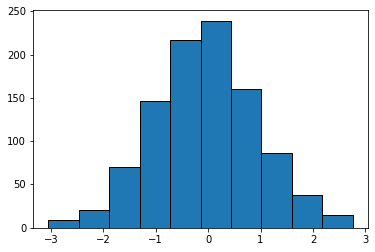

In [3]:
sample = np.random.normal(size=1000)
plt.hist(sample, bins=10, edgecolor='black')
plt.show()

Histograms pose, or can be, the starting point towards establishing
the empirical distribution of the observed data. However,
towards this direction, the choice of the number of bins is
important. Indeed the number of bins controls the 
coarseness of the distribution i.e. number of bars and, in turn, how well the density of the observations is plotted. Thus it is always a good idea to experiment with different bin sizes for a given data sample to get multiple perspectives or views on the same data. 
Notice that we can pass ```bins='auto'``` and let ```matplotlib.pyplot``` to select the
proper number of bins. 

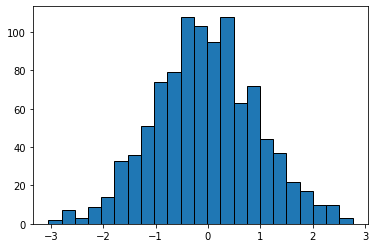

In [4]:
plt.hist(sample, bins='auto', edgecolor='black')
plt.show()

In contrast, running the example with bins set to 3 makes the normal distribution less obvious. This is shown below

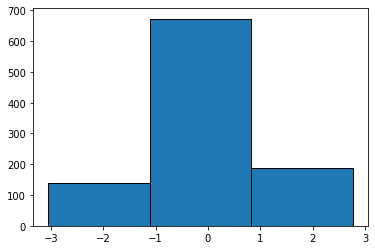

In [5]:
# plot a histogram of the sample
plt.hist(sample, bins=3, edgecolor='black')
plt.show()

Reviewing a histogram of a data sample with a range of different numbers of bins will help to identify whether the density looks like a common probability distribution or not.

----
**Remark**

A common rule of thumb in order to choose the number of bins is the following

$$\text{Bins} = \sqrt{N}$$

where $N$ is the number of data points available. 

----

The ```matplotlib.pyplot.hist``` function returns some useful 
information such as the total number of binned groups, the bin edges e.t.c

Number of Bins: 23
Bin width: 0.2524129638618047


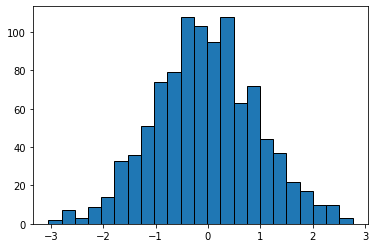

In [6]:
counts, bin_edges, _ = plt.hist(sample, bins='auto', edgecolor='black')
print(f"Number of Bins: {counts.size}")

bin_width = bin_edges[1] - bin_edges[0]
print(f"Bin width: {bin_width}")

We can use the ```bin_edges``` array above alongside ```counts``` in order infert the element count and coverage range for any specified bin. This is done below

In [7]:
def get_bin_coverage(i, hist_counts: list, bin_edges: list):
    
    count = int(hist_counts[i])
    range_start, range_end = bin_edges[i], bin_edges[i+1]
    return count, range_start, range_end
    

In [8]:
count, range_start, range_end = get_bin_coverage(0, 
                                                 counts, bin_edges)
range_string = f"{range_start} - {range_end}"
print((f"The bin for frequency range {range_string} contains "
           f"{count} element{'' if count == 1 else 's'}"))

The bin for frequency range -3.0461430547999266 - -2.793730090938122 contains 2 elements


In [9]:
count, range_start, range_end = get_bin_coverage(counts.argmax(), 
                                                 counts, bin_edges)
range_string = f"{range_start} - {range_end}"
print((f"The bin for frequency range {range_string} contains "
           f"{count} element{'' if count == 1 else 's'}"))

The bin for frequency range -0.5220134161818795 - -0.2696004523200748 contains 108 elements


## Compute probabilities from histograms

As mentioned above, a histogram can be used in order to derive the empirical density
function of the observed data. Moreover, we know that the area under a PDF should be equal to one.
This is not necessarily true for the histogram above and in general this will be the case. ```matplotlib.pyplot.hist``` function allows us to easilly deal with this case.  We can turn the histogram into relative likelihoods by passing ```density=True```

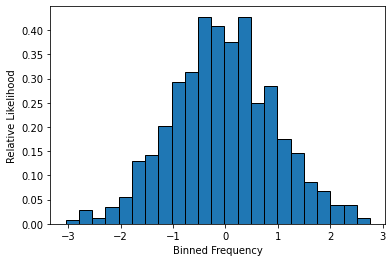

In [10]:
rel_likelihoods, bin_edges, _ = plt.hist(sample, bins='auto', 
                                         edgecolor='black', density=True)
plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')
plt.show()


Observe that the $y-axis$ now does not show counts but the relative likelihood. The area under the
histogram should now be equal to one

In [32]:
bin_width = bin_edges[1] - bin_edges[0]
print(f"Area under histogram={rel_likelihoods.sum() * bin_width}")

Area under histogram=0.9999999999999999


Now the area beneath each bin, will equal the probability of finding an observation within that bin.
Let's calculate the two extreme probabilities

In [11]:
index = rel_likelihoods.argmax()
area = rel_likelihoods[index] * bin_width
range_start, range_end = bin_edges[index], bin_edges[index+1]
range_string = f"{range_start} - {range_end}"
print(f"probability of falling in the max interval {range_string} is {area}")


index = rel_likelihoods.argmin()
area = rel_likelihoods[index] * bin_width
range_start, range_end = bin_edges[index], bin_edges[index+1]
range_string = f"{range_start} - {range_end}"
print(f"probability of falling in the min interval {range_string} is {area}")

probability of falling in the max interval -0.5220134161818795 - -0.2696004523200748 is 0.10800000000000001
probability of falling in the min interval -3.0461430547999266 - -2.793730090938122 is 0.002


## Summary

In this section we reviewd histogram plots. A histogram plot simply shows the frequencies of items that have been collected into bins.
Thus, in order to build a  histogram plot we must first group the observations into bins and then
count the number of events that fall into each bin. Histograms are easy to construct and this is one of their major
advantage.

However, the selected number of bins affects the quality of the plot.  A common rule of thumb in order to choose the number of bins is the following

$$\text{Bins} = \sqrt{N}$$

where $N$ is the number of data points available. 


A histogram can also be used to show probabilities. In this case the area under the 
histogram should be appoximately equal to 1. In this case we can calculate the probability of 
an observation falling within a bin as the area occupied by the bin i.e.


$$\text{Area of bin} = \text{Relative probability assigned to bin}\times \text{Bin width}$$

We also saw how to use the ```matplotlib.pyplot.hist```. This function does most of the heavy duty for us.
The choice ```bins='auto'``` can be used in order to instruct ```matplotlib``` to infer the appropriate number of
bins to be used in the plot. The ```matplotlib.pyplot.hist``` returns some useful information such as the number of counts each
bin contains and the bin width. We can instruct ```matplotlib.pyplot.hist``` to generate probabilties by setting ```density=True```.

You can find more about ```matplotlib.pyplot.hist``` in [1]. One way to overcome the limitations of a histogram plot due to the number of
bins specification is to use a bee swarm plot. We will review this in the next section.

## References

1. <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html">matplotlib.pyplot.hist</a>
2. Leonard Apeltsin, _Data Science Bootcamp_, Manning Publications, 20212.